## 参考
- [Top 50 matplotlib Visualizations – The Master Plots (with full python code)](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

# 使用指南

为了Matplotlib新手安全上路，本教程介绍了一些基本的用法模式和最佳实践，

In [2]:
# [1]: 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 简单的例子

> Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The most simple way of creating a figure with an axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

matplotlib将数据绘制成图Figure，每张图都包含一个或多个轴空间Axes。创建带有轴空间的图，最简单的方法是使用pyplot.subplots方法。然后就能用Axes.plot这样的辅助方法在坐标轴上画点啥了。比如像这样：

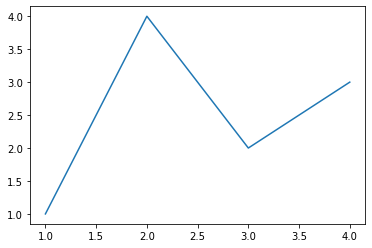

In [3]:
# [2]: 
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

> Many other plotting libraries or languages do not require you to explicitly create an axes. For example, in MATLAB, one can just do

许多其它的制图库或语言不需要显示创建坐标轴。例如在MATLAB里，想画啥画啥。
```matlib
plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot.
```

> In fact, you can do the same in Matplotlib: for each Axes graphing method, there is a corresponding function in the matplotlib.pyplot module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So the previous example can be written more shortly as

实际上，我们也可以在Matplotlib里这么干，每一个Axes的绘图方法在matplotlib.pyplot模块中都有一个对应的函数，这个函数在“当前”轴空间上完成绘制，如果当前没有轴空间，则会创建一个轴空间及其所依附的图。所以上面的例子可以写的更短一些。

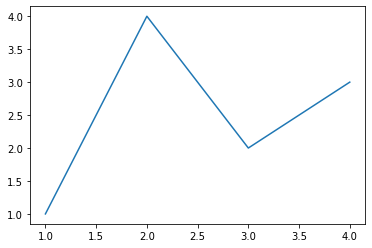

In [9]:
# [3]: 
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

## 图解
![!](https://matplotlib.org/_images/anatomy.png)

### Figure

> The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of Axes, but will typically have at least one.

> The easiest way to create a new figure is with pyplot:

Figure 图，图之整体。figure跟踪所有轴空间，一少部分特殊“艺术家”（标题，图例，等）以及画布。图能够容纳任意数量的轴空间，但通常至少会有一个。

创建新图的最简单方法是使用pyplot：

In [ ]:
# [4]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes

> This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

> The Axes class and its member functions are the primary entry point to working with the OO interface.

Axes 轴空间，是带有数据空间的图像区域。一个给定的图figure可以包含多个轴空间Axes，但是一个给定的Axes对象只能在一个图中。轴空间Axes包含两个轴Axis对象，它们负责数据范围（数据范围也能通过axes.Axes.set_xlim()与axes.Axes.set_ylim()控制）。每个轴坐标都有一个标题，通过set_title()设置，一个横轴标签，通过set_xlabel设置，一个竖轴标签，通过set_ylabel设置。

Axes类及其成员函数是使用面向对象接口的最主要入口点。

### Axis
> These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

Axis 轴，是一种类似数字线的对象。负责设置图形范围，生成刻度及刻度标签。刻度的位置由Locator对象确定，刻度标签字符串由Formatter格式化。恰当的Locator/Formatter组合可以很好地控制刻度位置和标签。

### Artist
> Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

Aritst 艺术家。从根上说，在图上看到的所有东西都是artist（Figure, Axes, Axis对象也是）。当图渲染后，所有的aritists都被画在画布上。大部分Aritsts都被绑在Axes上；如此一个Aritist不能被多个Axes共享，或从一个移到另一个。

## 绘图函数的输入类型

> All of plotting functions expect numpy.array or numpy.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and numpy.matrix may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

所有绘图函数都希望numpy.array或numpy.ma.masked_array作为输入。一些类似于数组的类，如pandas数据对象和numpy.matrix可能会或可能不会按预期工作。所以最好在绘制之前将它们转换为numpy.array对象。

In [3]:
# [5]: 转换pandas.DataFrame
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

In [5]:
# [6]: 转换numpy.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

## OO接口与pyplot接口 
The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:

Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.
So one can do (OO-style)

如上所述，使用Matplotlib基本上有两种风格：

1. 显式创建图形与轴空间，并在其上调用方法的OO风格。
2. 依靠pyplot自动创建和管理图形和轴，并使用pyplot函数进行绘图的plt风格。

In [ ]:
# OO-Style
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
# pyplot-style
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Actually there is a third approach, for the case where you are embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. 

实际上，还有第三种方法，就是把Matplotlib嵌入GUI应用中。

Matplotlib's documentation and examples use both the OO and the pyplot approaches (which are equally powerful), and you should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project).

Matplotlib的文档及示例即使用OO方法也使用pyplot方法，它们有相同的能力，可以随意使用。但最好不要混用。一般的建议是交互绘图使用pyplot，非交互绘图使用OO方式。

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

我们常常对一种图，使用不同的数据集重复绘制，比如：月销售额图表。这样就需要为这事写一个函数。这里函数签名推荐如下形式：

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

就是将关键字参数放入字典中，使用如下：

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

两个子图的用法

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

对于这些简单的示例，似乎用错了刀，但是一旦图形变得稍微复杂一点，它就会得到回报。